In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso 
from sklearn import metrics

In [5]:
car_data= pd.read_csv("CarPrice_Assignment.csv")

In [6]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
#number of rows and coloumns
car_data.shape

(205, 26)

In [10]:
car_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
#checking no of missing values 
car_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [44]:
print(car_data.fueltype.value_counts())
print(car_data.carbody.value_counts())
print(car_data.drivewheel.value_counts())
print(car_data.enginelocation.value_counts())
print(car_data.aspiration.value_counts())
print(car_data.doornumber.value_counts())
print(car_data.enginetype.value_counts())
print(car_data.cylindernumber.value_counts())
print(car_data.fuelsystem.value_counts())



fueltype
0    185
1     20
Name: count, dtype: int64
carbody
0    96
1    70
2    25
3     8
4     6
Name: count, dtype: int64
drivewheel
0    120
1     76
2      9
Name: count, dtype: int64
enginelocation
0    202
1      3
Name: count, dtype: int64
aspiration
0        168
turbo     37
Name: count, dtype: int64
doornumber
0    115
1     90
Name: count, dtype: int64
enginetype
0       148
1        15
ohcv     13
3        12
l        12
5         4
6         1
Name: count, dtype: int64
cylindernumber
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: count, dtype: int64
fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64


In [17]:
car_data.replace({'fueltype':{'gas':0,'diesel': 1}},inplace=True)

In [18]:

car_data.replace({'carbody':{'sedan':0,'hatchback': 1,'wagon':2,'hardtop':3,'convertible': 4}},inplace=True)


In [19]:
car_data.replace({'drivewheel':{'fwd':0,'rwd': 1,'4wd':2}},inplace=True)


In [20]:
car_data.replace({'enginelocation':{'front':0,'rear': 1}},inplace=True)

In [85]:
car_data.replace({'aspiration':{'std':0,'turbo': 1}},inplace=True)

In [76]:
car_data.replace({'doornumber':{'four':0,'two': 1}},inplace=True)

In [71]:
car_data.replace({'enginetype':{'ohc':0,'ohcf': 1,'ohcv': 2,'dohc': 3,'l': 4,'rotor': 5,'dohcv': 6}},inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1108\171583672.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'enginetype':{'ohc':0,'ohcf': 1,'ohcv': 2,'dohc': 3,'l': 4,'rotor': 5,'dohcv': 6}},inplace=True)


In [72]:
car_data.replace({'cylindernumber':{'four':0,'two': 1,'three': 2,'five': 3,'six': 4,'eight': 5,'twelve': 6}},inplace=True)

In [61]:
car_data.replace({'fuelsystem':{'mpfi':0,'2bbl': 1,'idi': 2,'1bbl': 3,'spdi': 4,'4bbl': 5,'mfi': 6,'spfi': 7}},inplace=True)


In [83]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,1,4,1,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,0,1,4,1,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,1,1,1,0,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,0,0,0,0,0,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,0,0,0,2,0,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


In [86]:
X= car_data.drop(['CarName','price'], axis=1)
Y= car_data['price']

In [87]:
print(X)

     car_ID  symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0         1          3         0           0           1        4           1   
1         2          3         0           0           1        4           1   
2         3          1         0           0           1        1           1   
3         4          2         0           0           0        0           0   
4         5          2         0           0           0        0           2   
..      ...        ...       ...         ...         ...      ...         ...   
200     201         -1         0           0           0        0           1   
201     202         -1         0           1           0        0           1   
202     203         -1         0           0           0        0           1   
203     204         -1         1           1           0        0           1   
204     205         -1         0           1           0        0           1   

     enginelocation  wheelb

In [28]:
print(Y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


In [29]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.1 , random_state=2)

In [63]:
linear_reg= LinearRegression()

In [89]:
# Convert all columns to numeric, coerce errors to NaN
X_train = X_train.apply(pd.to_numeric, errors='coerce')
Y_train = pd.to_numeric(Y_train, errors='coerce')

# Optionally fill or drop NaN values
X_train = X_train.fillna(0)  # or another strategy
Y_train = Y_train.fillna(0)  # or another strategy

In [90]:
linear_reg.fit(X_train,Y_train)

LinearRegression()

In [93]:
#training data prediction 
training_linear_prediction= linear_reg.predict(X_train)

In [97]:
error_score=metrics.r2_score(Y_train,training_linear_prediction)
print("R square error :", error_score)

R square error : 0.8875158215206683


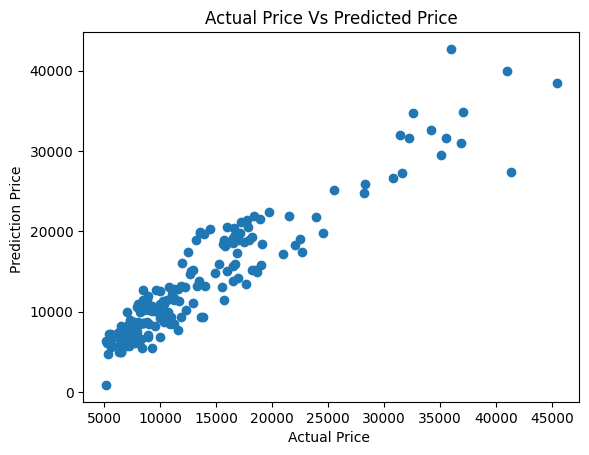

In [100]:
plt.scatter(Y_train,training_linear_prediction)
plt.xlabel("Actual Price ")
plt.ylabel("Prediction Price ")
plt.title("Actual Price Vs Predicted Price")
plt.show()

In [102]:
# Convert all columns to numeric, coerce errors to NaN
X_test = X_test.apply(pd.to_numeric, errors='coerce')
Y_test = pd.to_numeric(Y_test, errors='coerce')

# Optionally fill or drop NaN values
X_test = X_test.fillna(0)  # or another strategy
Y_test = Y_test.fillna(0)  # or another strategy

In [103]:
test_linear_prediction= linear_reg.predict(X_test)

In [104]:
error_score=metrics.r2_score(Y_test,test_linear_prediction)
print("R square error :", error_score)

R square error : 0.9278624048951054


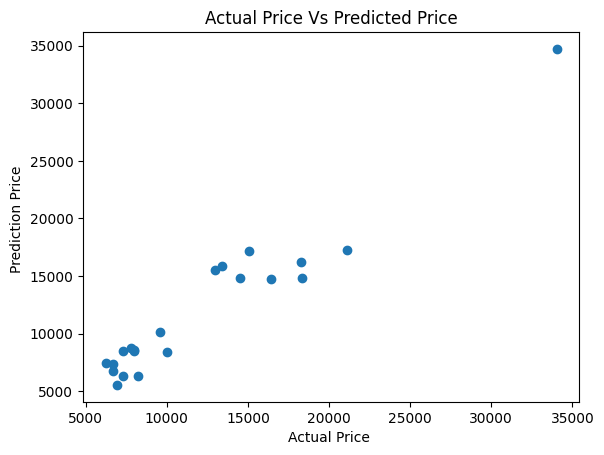

In [105]:
plt.scatter(Y_test,test_linear_prediction)
plt.xlabel("Actual Price ")
plt.ylabel("Prediction Price ")
plt.title("Actual Price Vs Predicted Price")
plt.show()

In [106]:
lass_reg= Lasso()

In [107]:
# Convert all columns to numeric, coerce errors to NaN
X_train = X_train.apply(pd.to_numeric, errors='coerce')
Y_train = pd.to_numeric(Y_train, errors='coerce')

# Optionally fill or drop NaN values
X_train = X_train.fillna(0)  # or another strategy
Y_train = Y_train.fillna(0)  # or another strategy

In [108]:
lass_reg.fit(X_train,Y_train)

Lasso()

In [110]:
#training data prediction 
training_lass_prediction= lass_reg.predict(X_train)

In [111]:
error_score=metrics.r2_score(Y_train,training_lass_prediction)
print("R square error :", error_score)

R square error : 0.8875019917521023


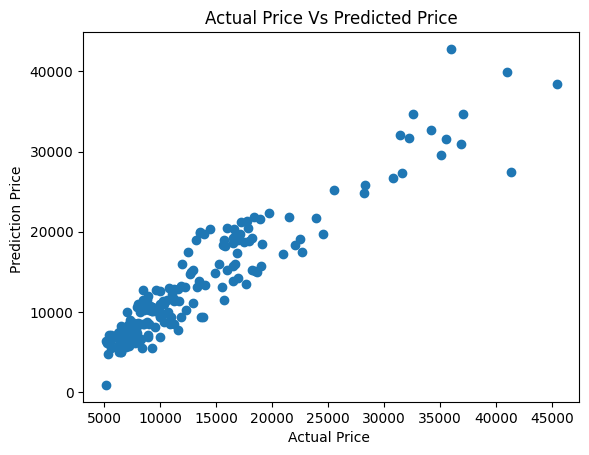

In [112]:
plt.scatter(Y_train,training_lass_prediction)
plt.xlabel("Actual Price ")
plt.ylabel("Prediction Price ")
plt.title("Actual Price Vs Predicted Price")
plt.show()

In [113]:
# Convert all columns to numeric, coerce errors to NaN
X_test = X_test.apply(pd.to_numeric, errors='coerce')
Y_test = pd.to_numeric(Y_test, errors='coerce')

# Optionally fill or drop NaN values
X_test = X_test.fillna(0)  # or another strategy
Y_test = Y_test.fillna(0)  # or another strategy

In [115]:
test_lass_prediction= lass_reg.predict(X_test)

In [116]:
error_score=metrics.r2_score(Y_test,test_lass_prediction)
print("R square error :", error_score)

R square error : 0.9285842975562053


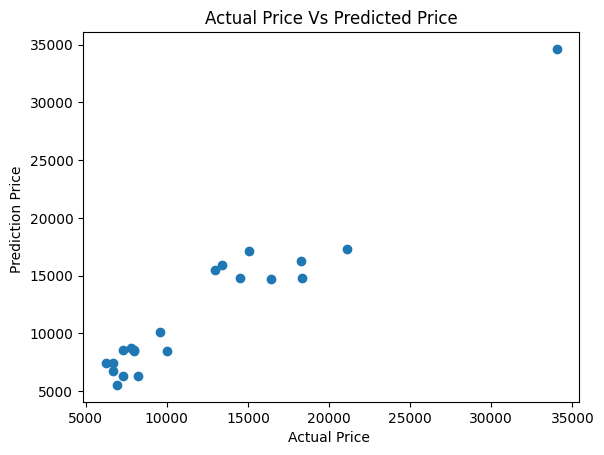

In [117]:
plt.scatter(Y_test,test_lass_prediction)
plt.xlabel("Actual Price ")
plt.ylabel("Prediction Price ")
plt.title("Actual Price Vs Predicted Price")
plt.show()